Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
insurance = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
insurance.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

Data Exploration

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
insurance.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [5]:
insurance.shape

(1000, 40)

In [6]:
insurance.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#dropping the columns
insurance = insurance.drop(['policy_number', 'policy_bind_date', '_c39'], axis=1)
insurance.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level  ... witnesses police_report_available  \
0                      MD  ...         2                     YES   
1                      MD  ...         0                       ?   
2                     PhD  ...         3                      NO   
3                     PhD  ...         2                      NO   
4               Associate  ...         1                      NO   

  total_claim_amount  injury_claim  property_claim vehicle_claim  auto_make  \
0              71610          6510           13020         52080       Saab   
1               5070           780             780          3510   Mercedes   
2              34650          7700            3850         23100      Dodge   
3              63400          6340            6340         50720  Chevrolet   
4               6500          1300             650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              Y  
1       E400      2007              Y  
2        RAM      2007              N  
3      Tahoe      2014              Y  
4        RSX      2009              N  

[5 rows x 37 columns]

Data Visualization

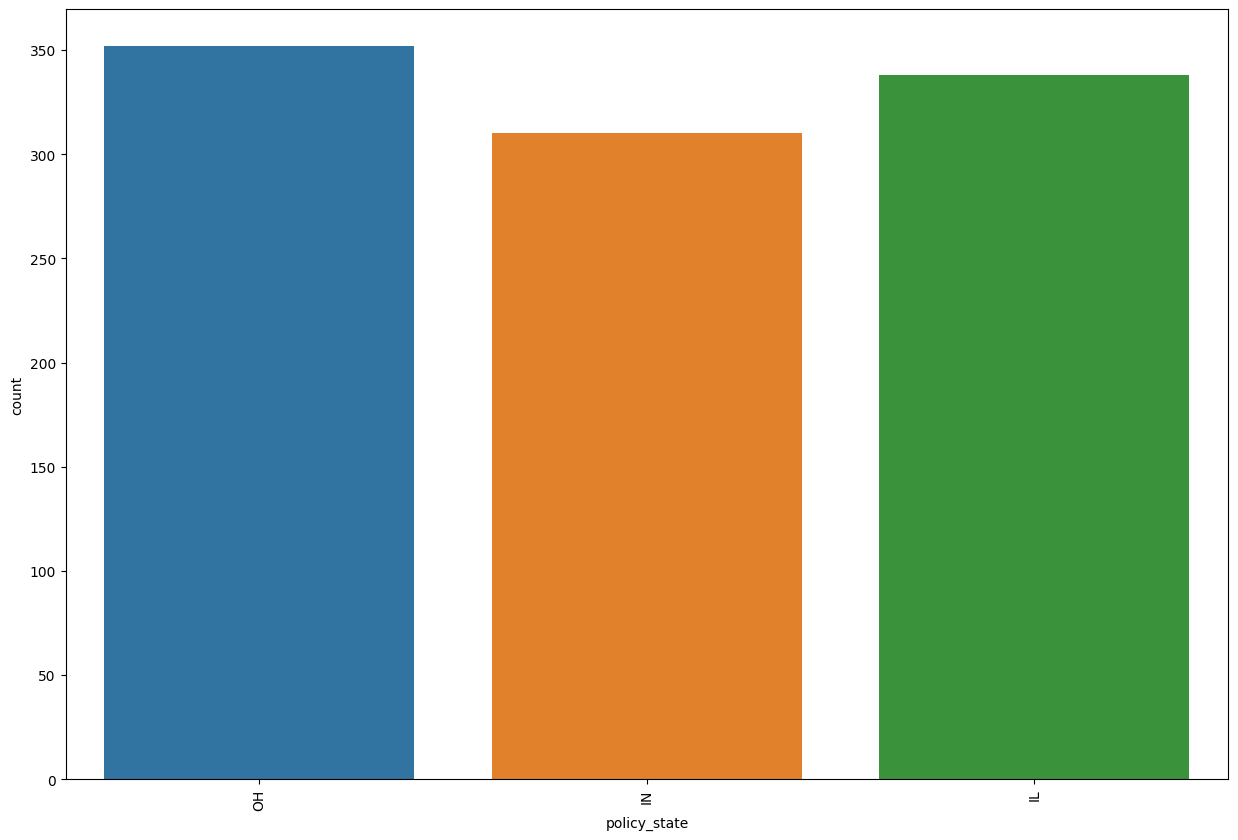

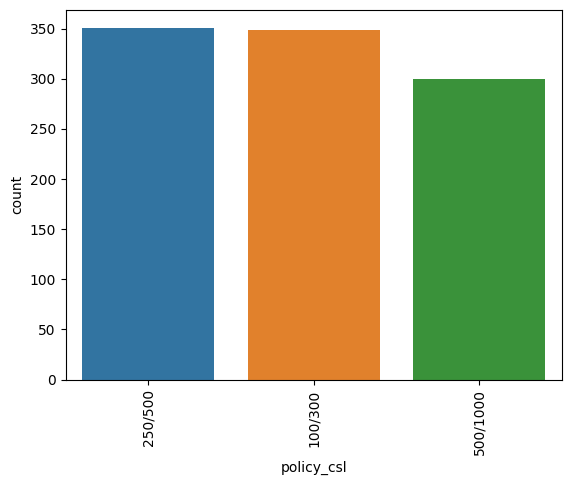

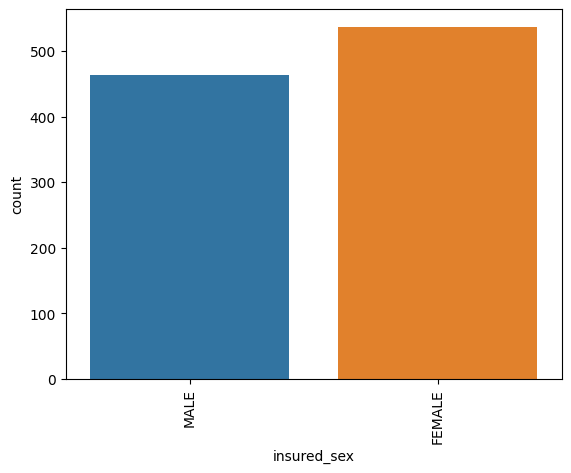

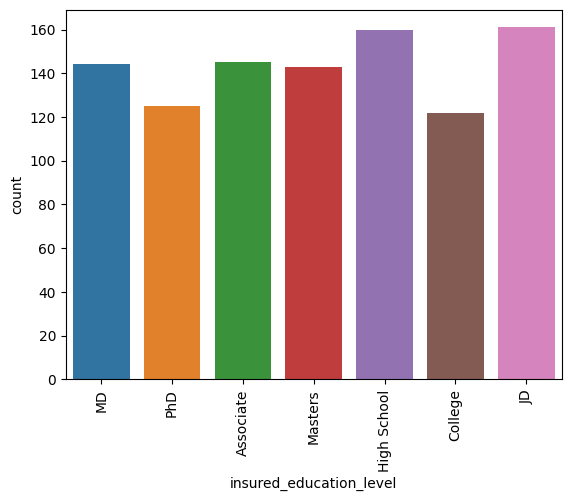

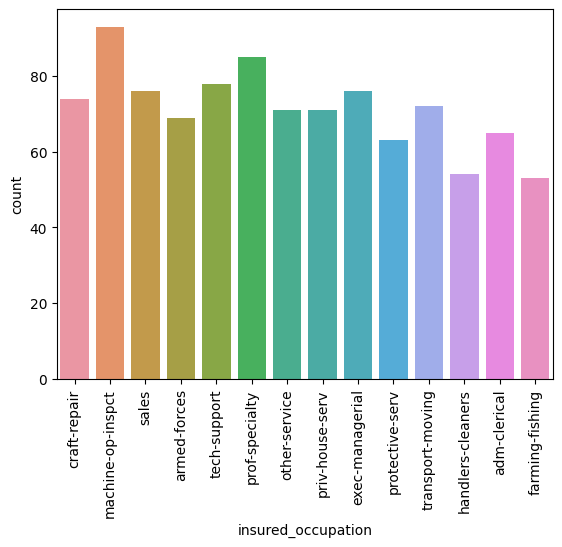

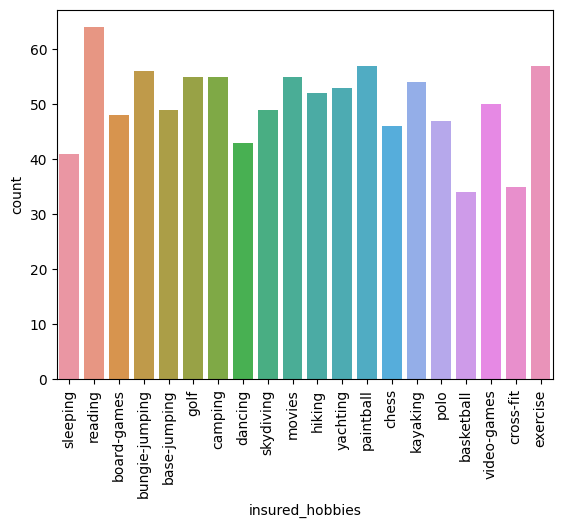

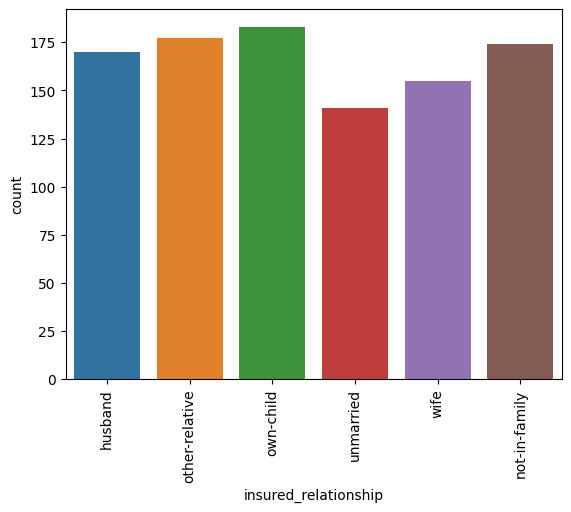

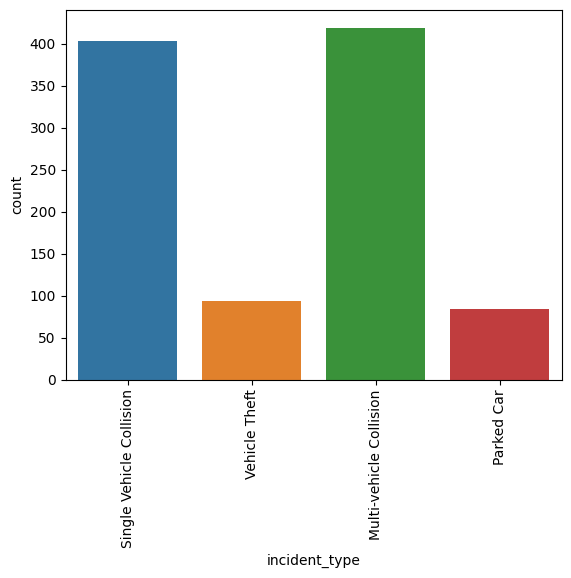

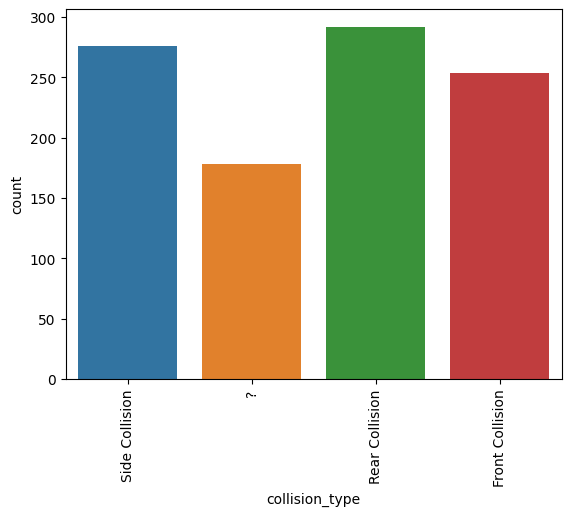

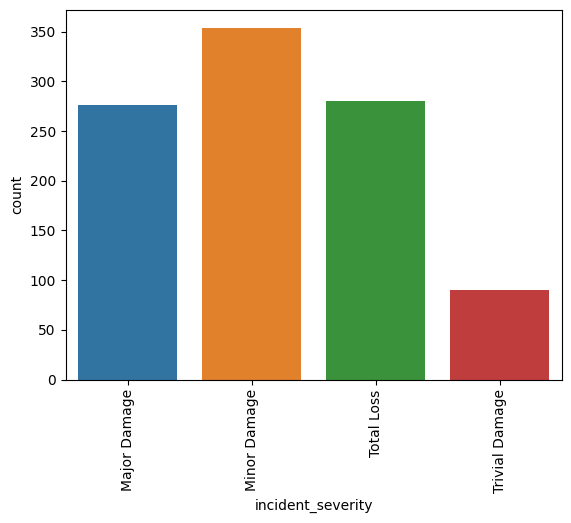

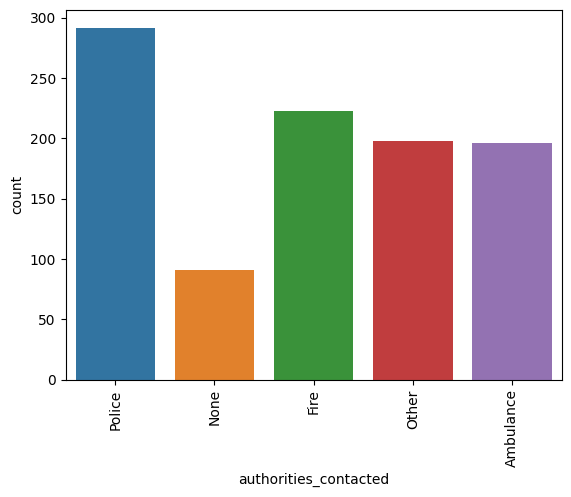

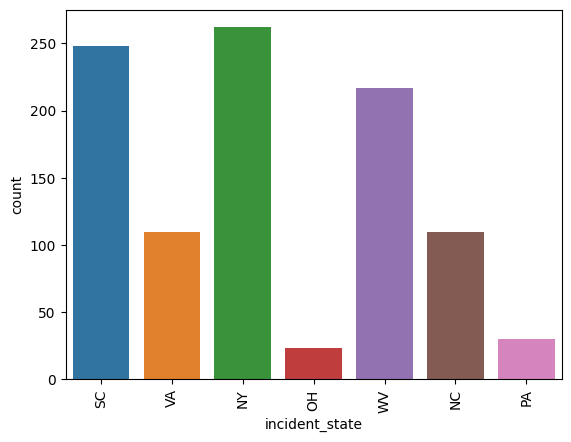

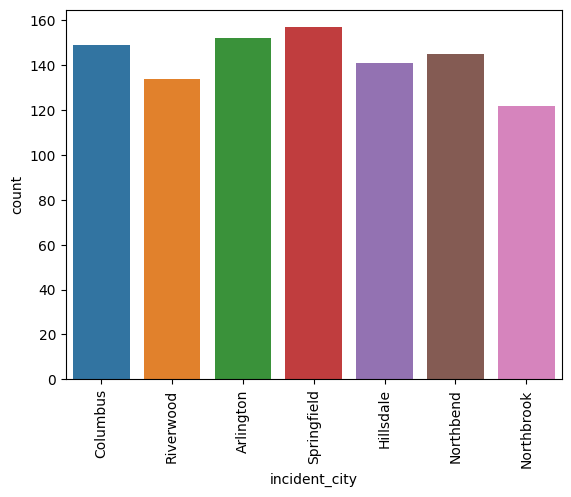

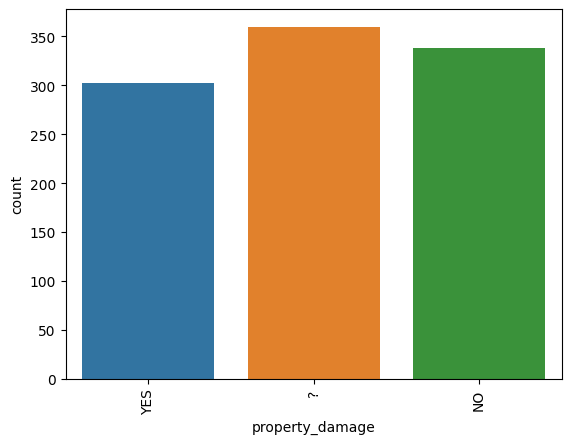

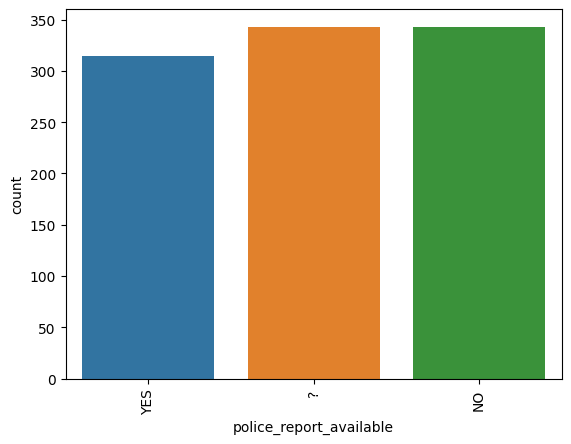

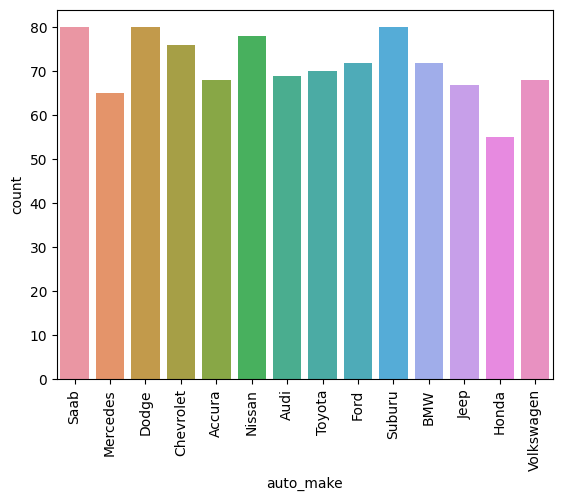

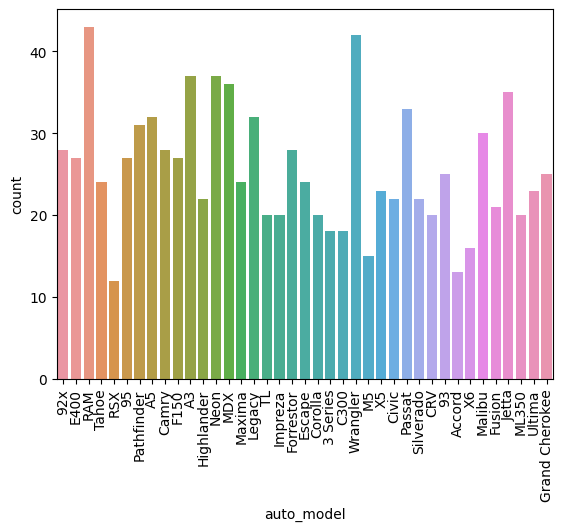

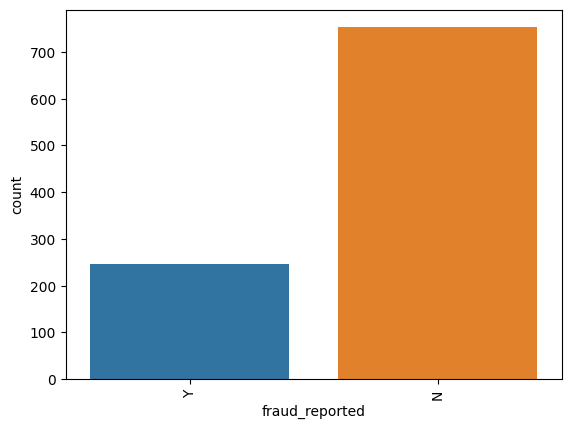

In [8]:
plt.figure(figsize=(15, 10))
cols = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
        'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported']
for i in cols:
    sb.countplot(data=insurance, x=i)
    plt.xticks(rotation=90)
    plt.show()

In [9]:
numerical_cols = insurance.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

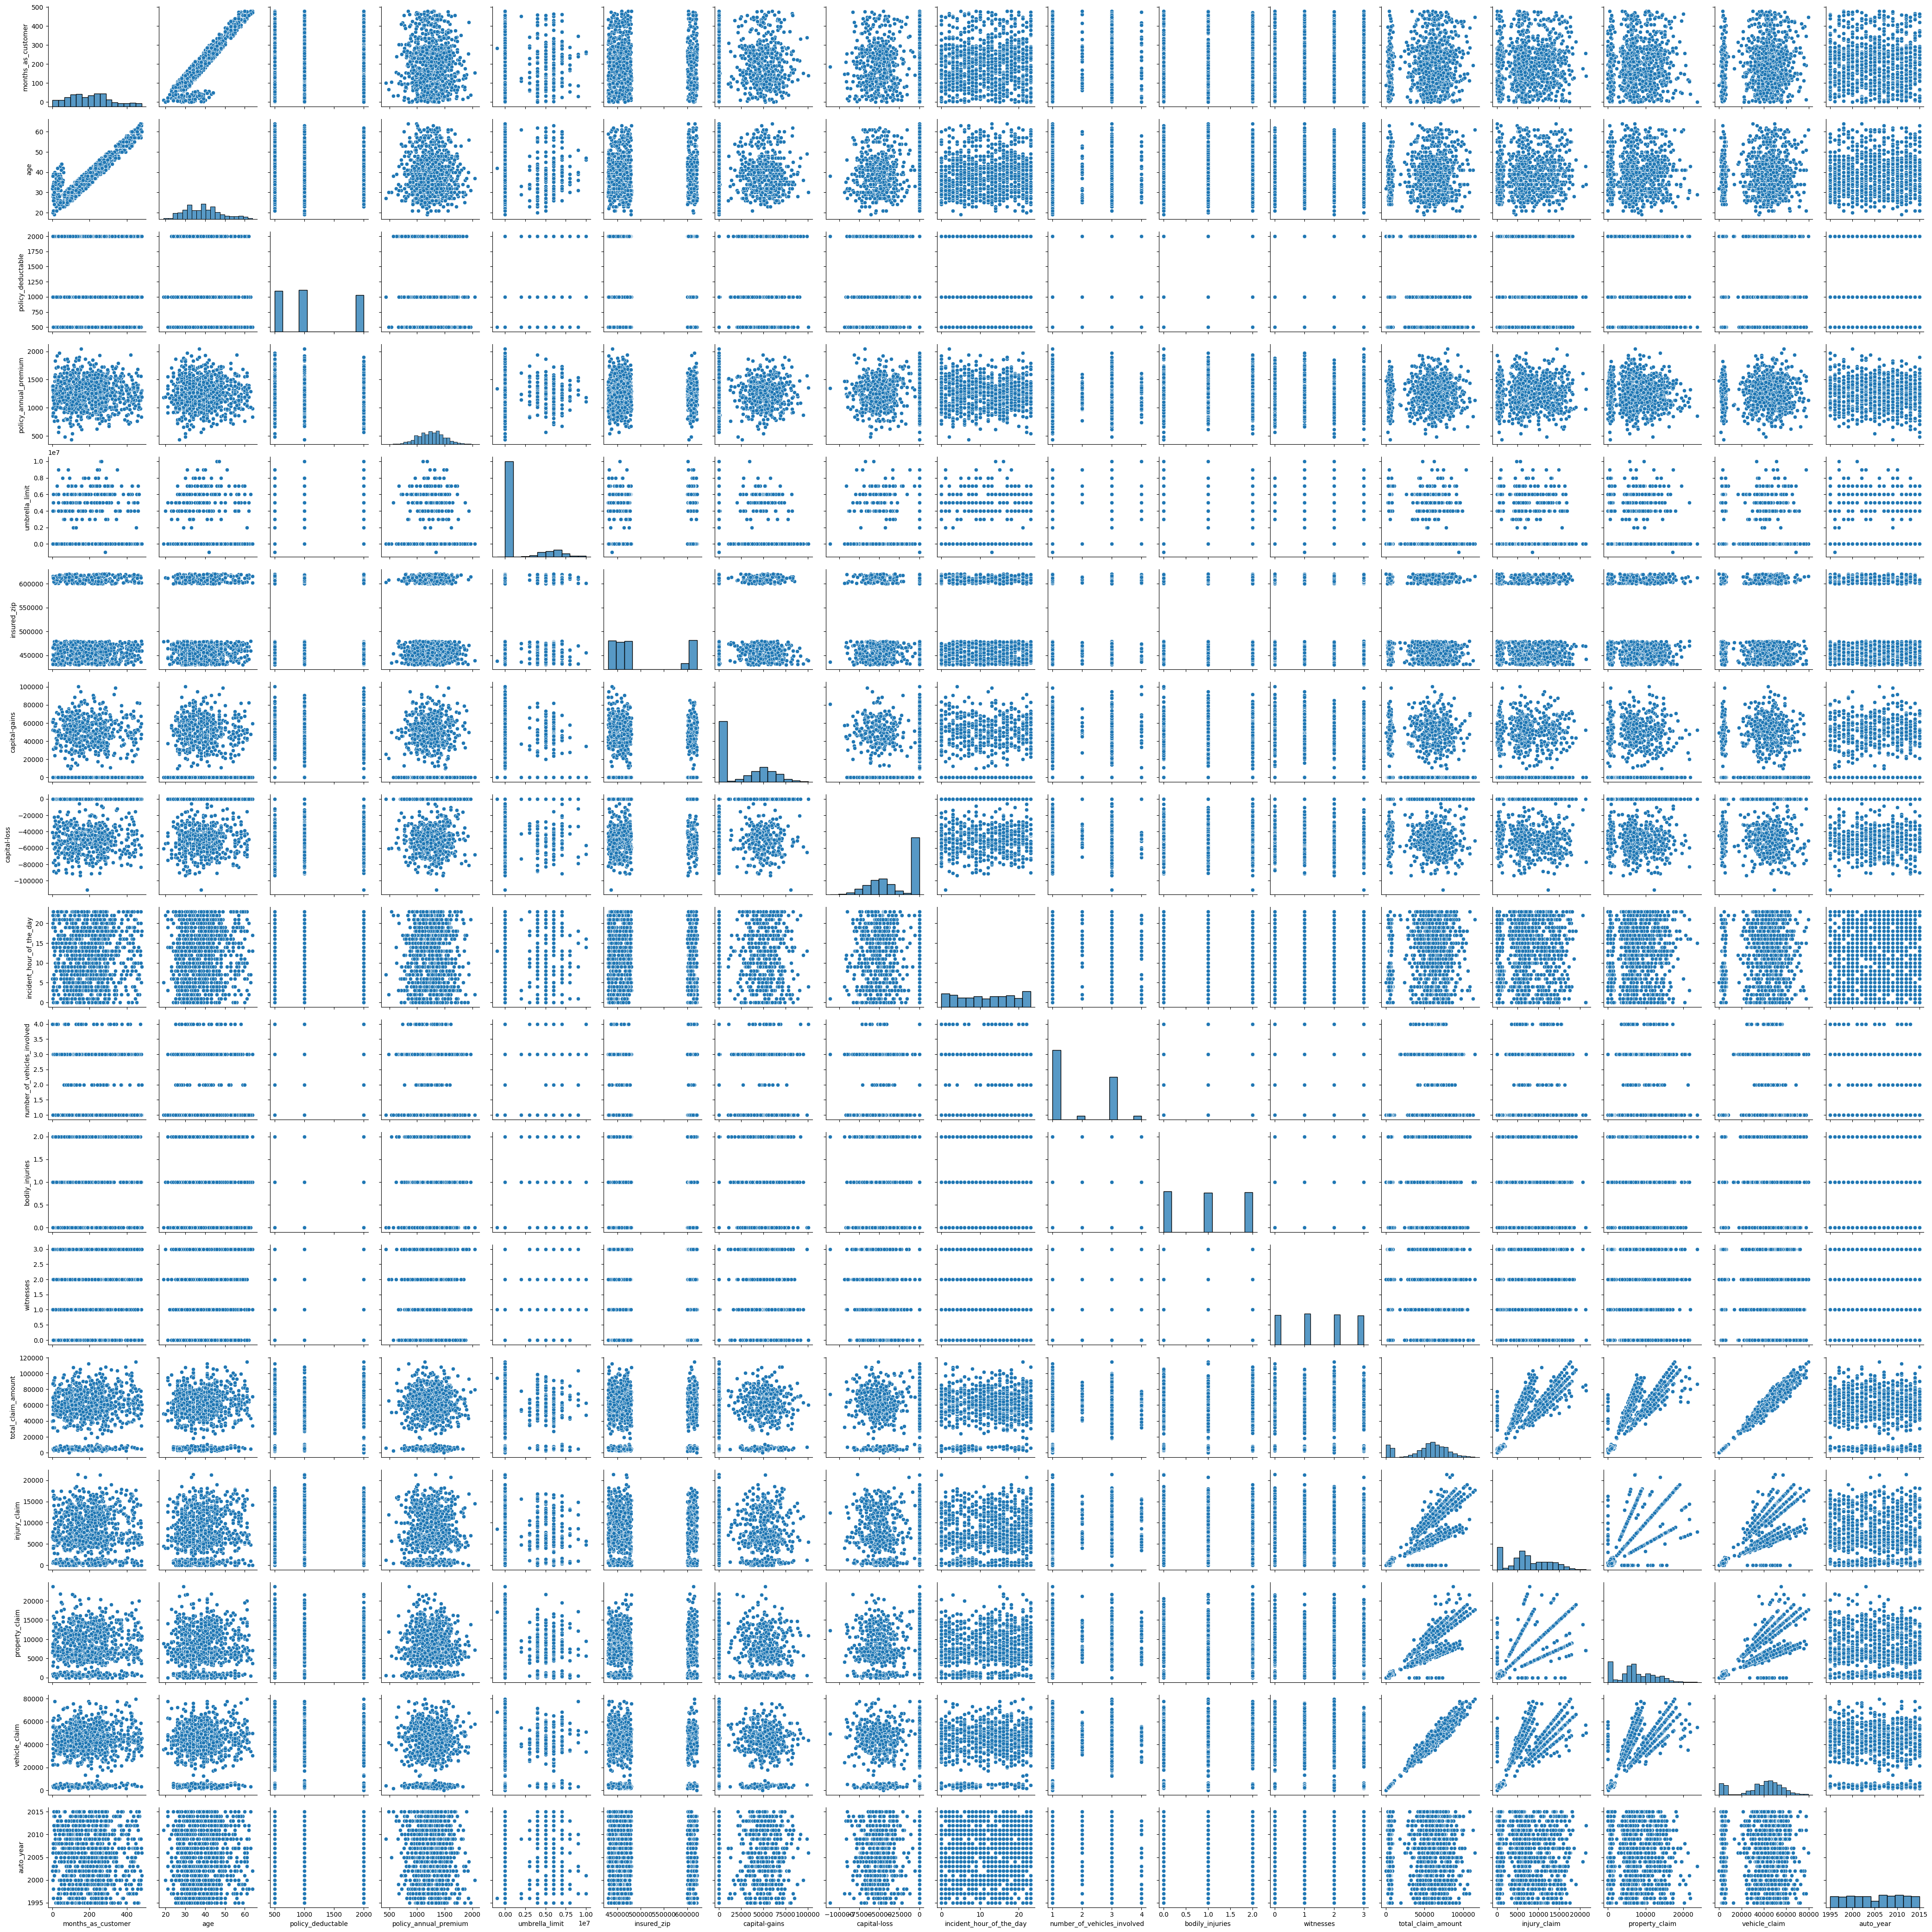

In [10]:
sb.pairplot(insurance[numerical_cols])
plt.show()

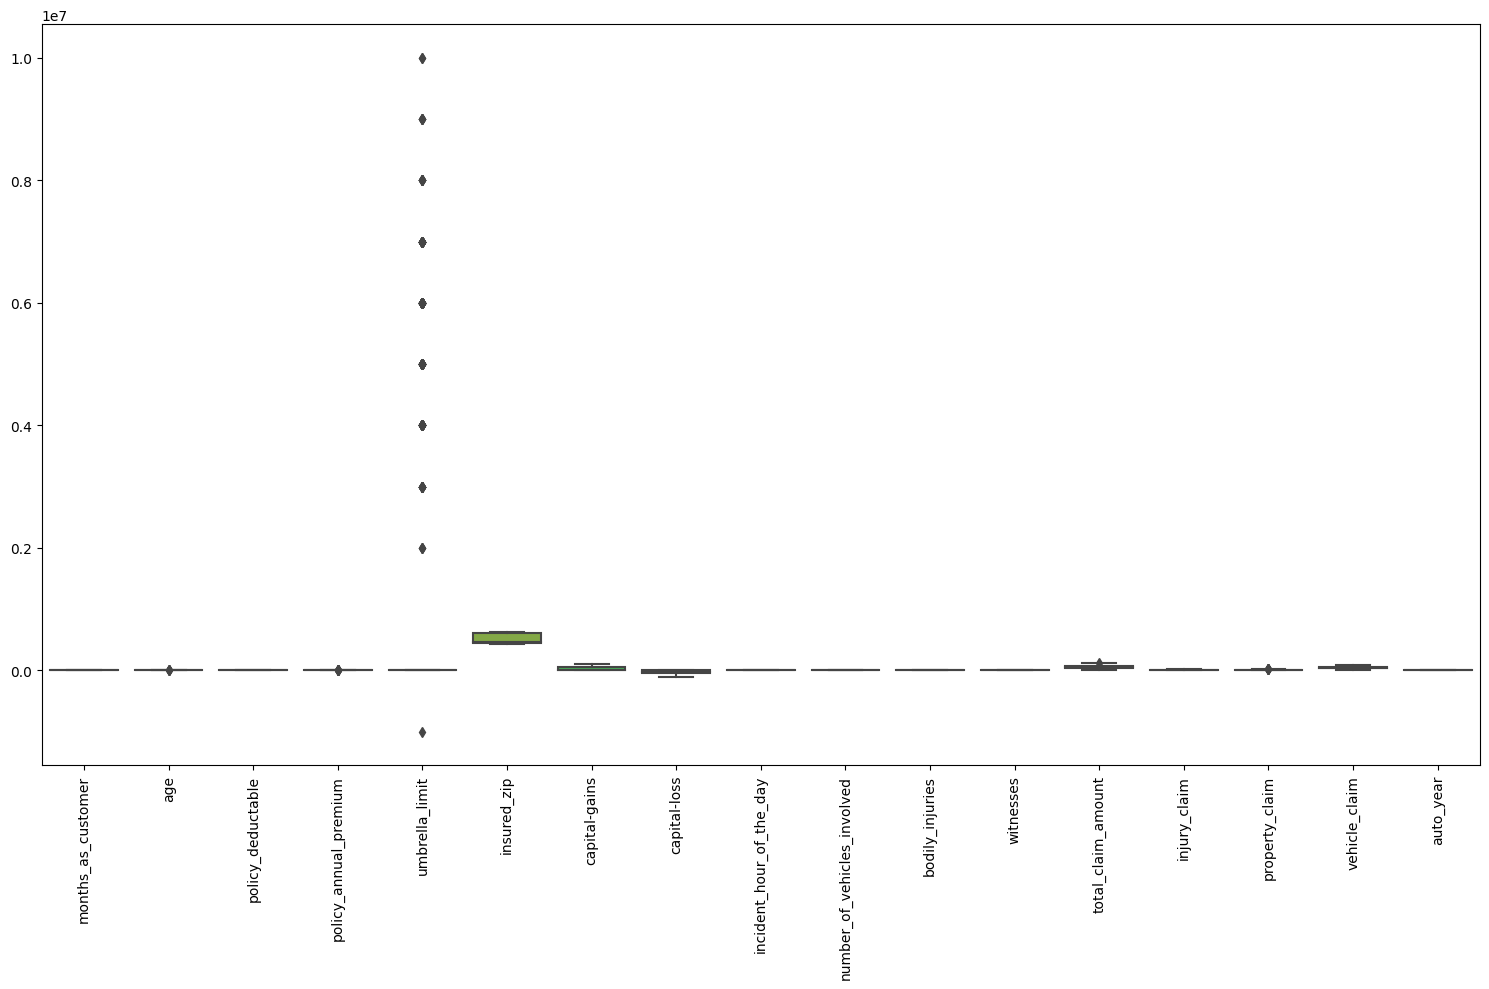

In [11]:
plt.figure(figsize=(15, 10))
sb.boxplot(data=insurance[numerical_cols])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

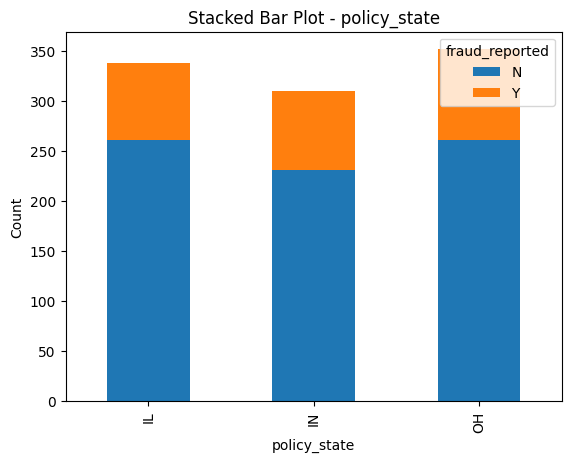

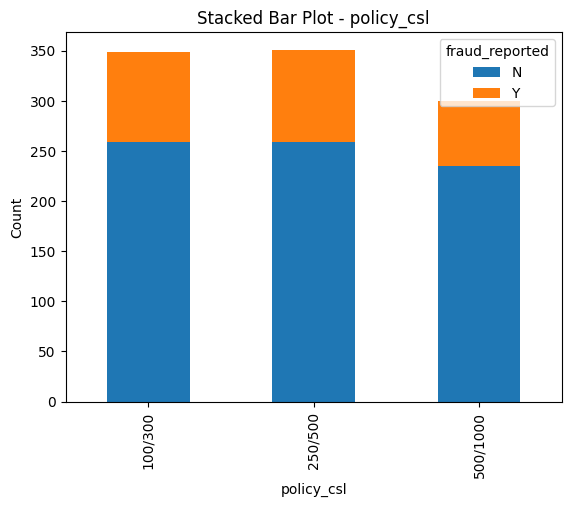

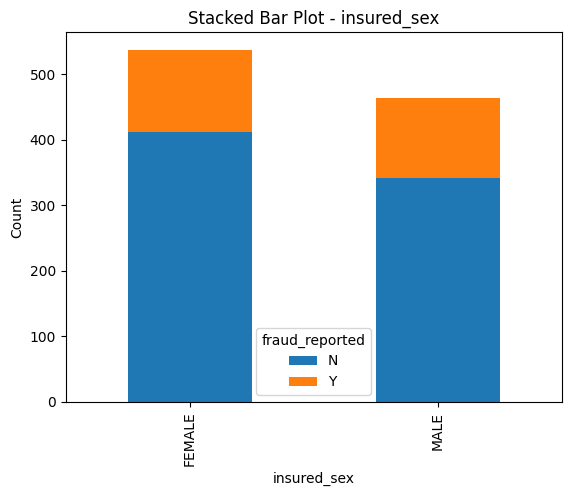

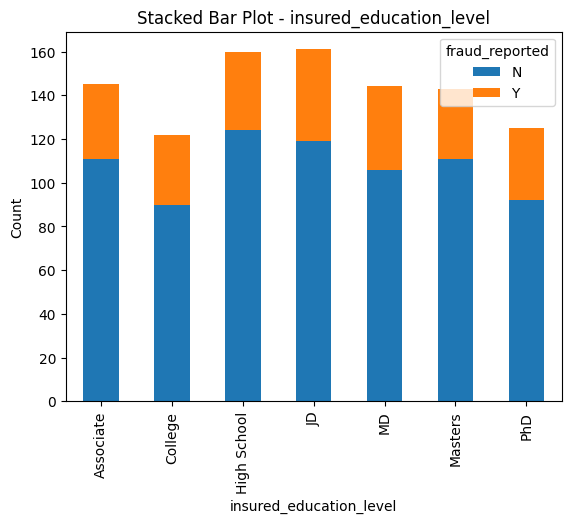

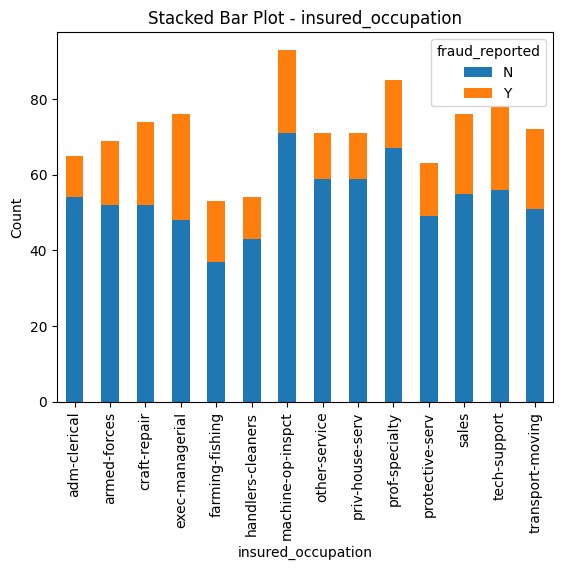

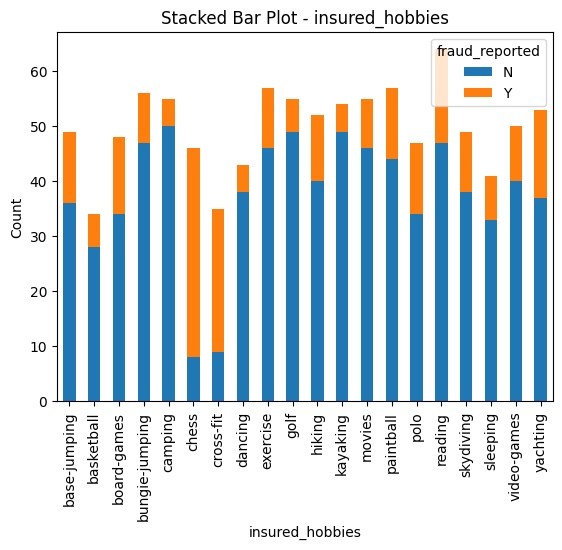

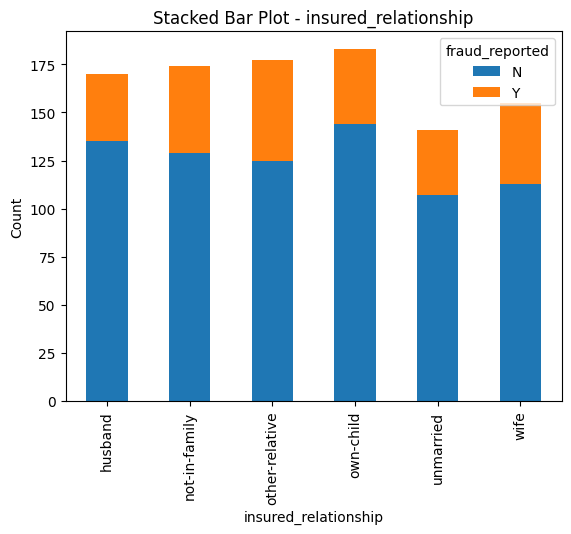

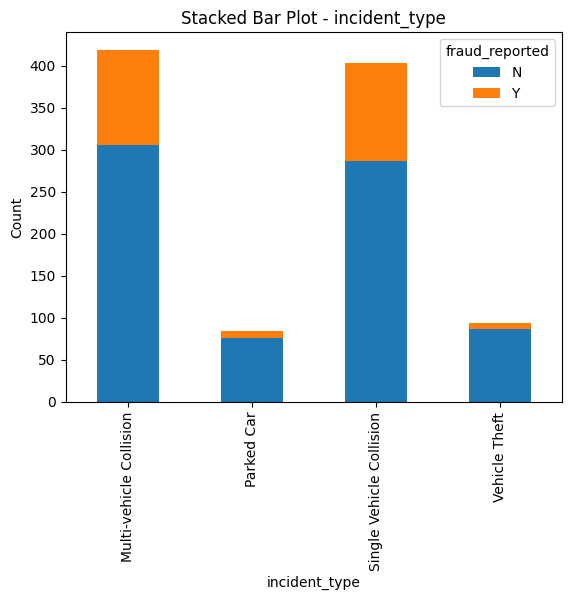

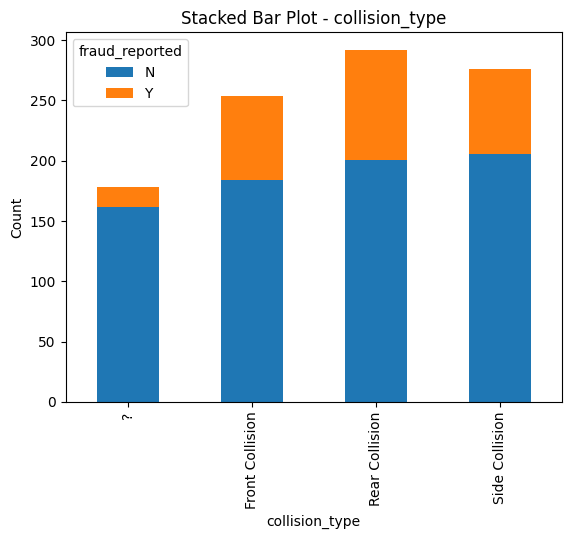

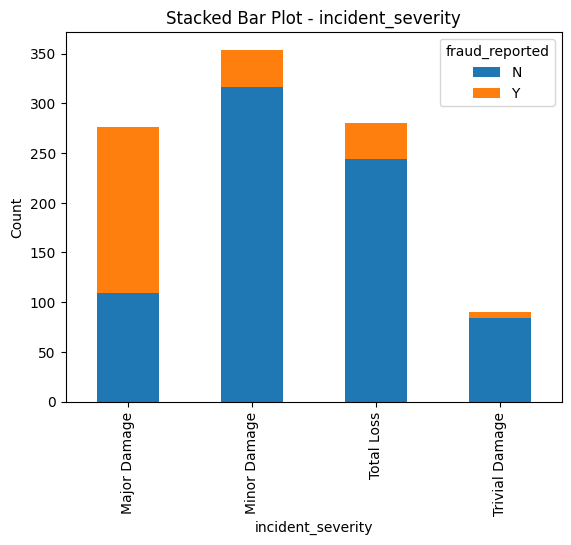

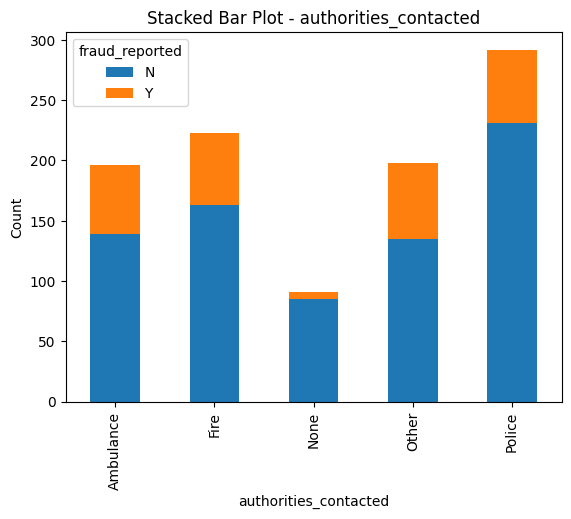

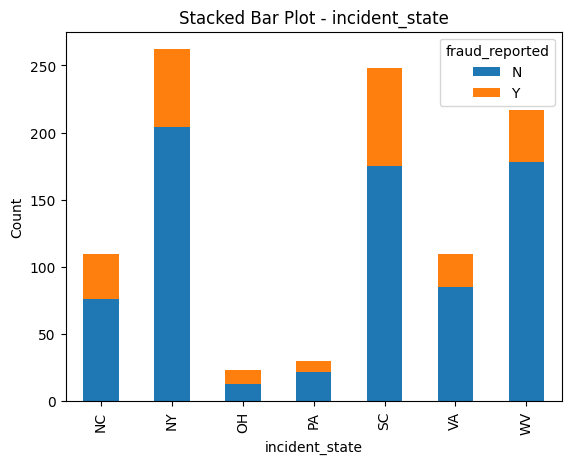

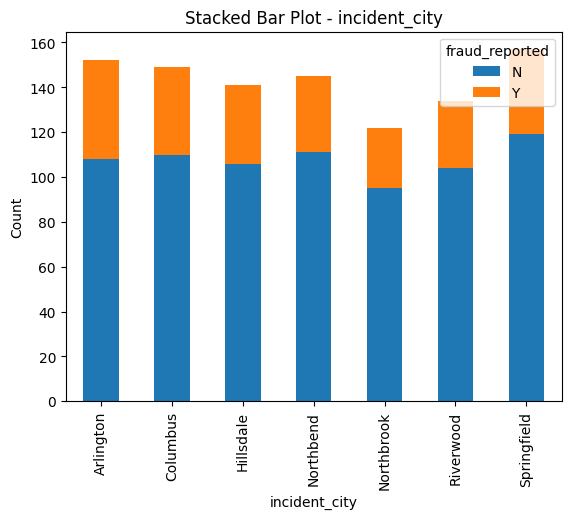

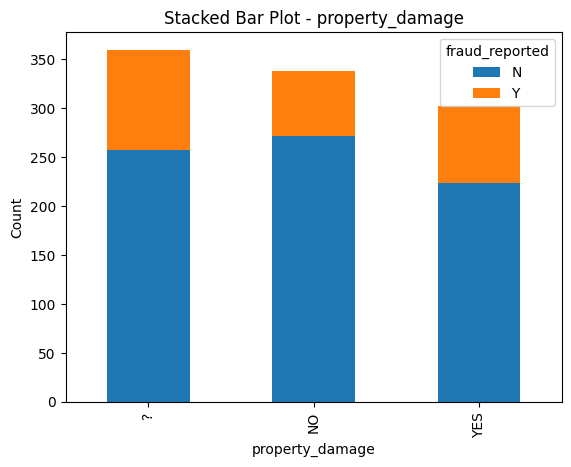

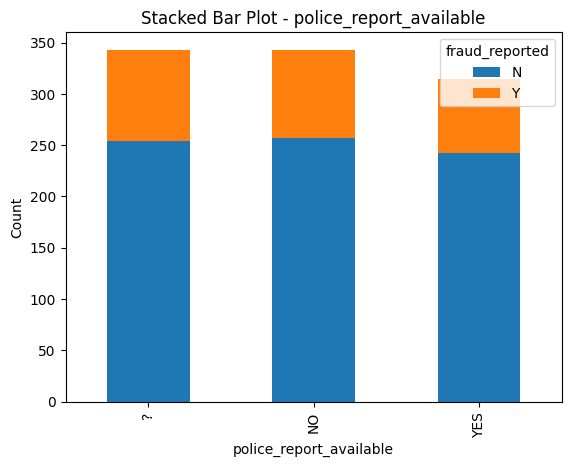

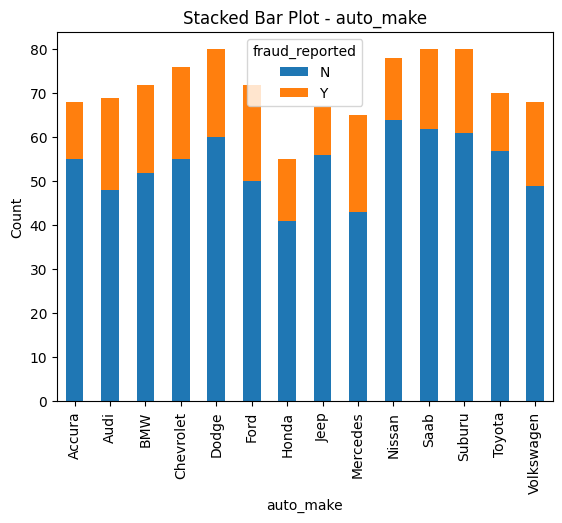

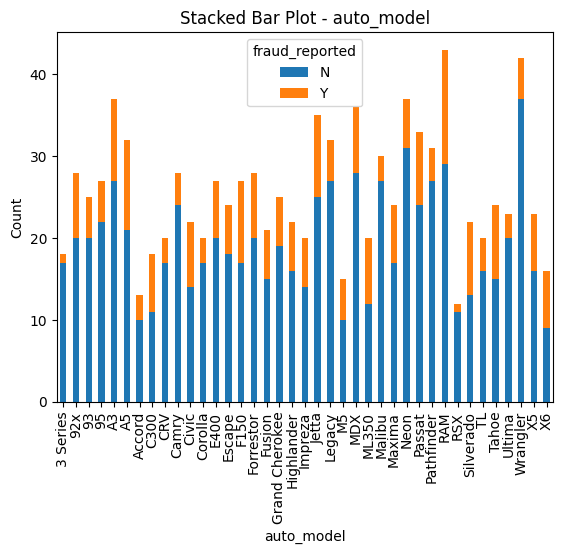

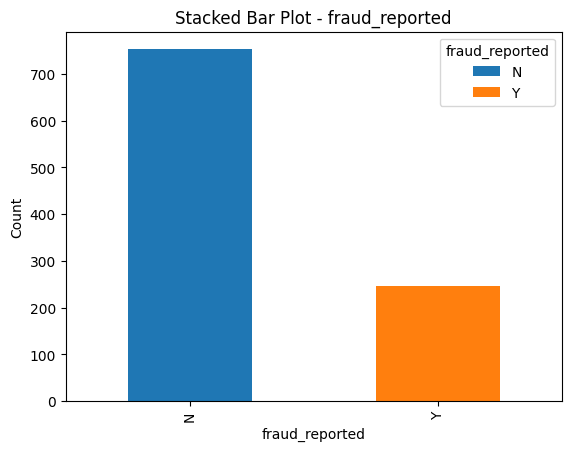

In [12]:
plt.figure(figsize=(15, 10))
for j in cols:
    cross_tab = pd.crosstab(insurance[j], insurance['fraud_reported'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.xticks(rotation=90)
    plt.xlabel(j)
    plt.ylabel('Count')
    plt.title(f'Stacked Bar Plot - {j}')
    plt.show()

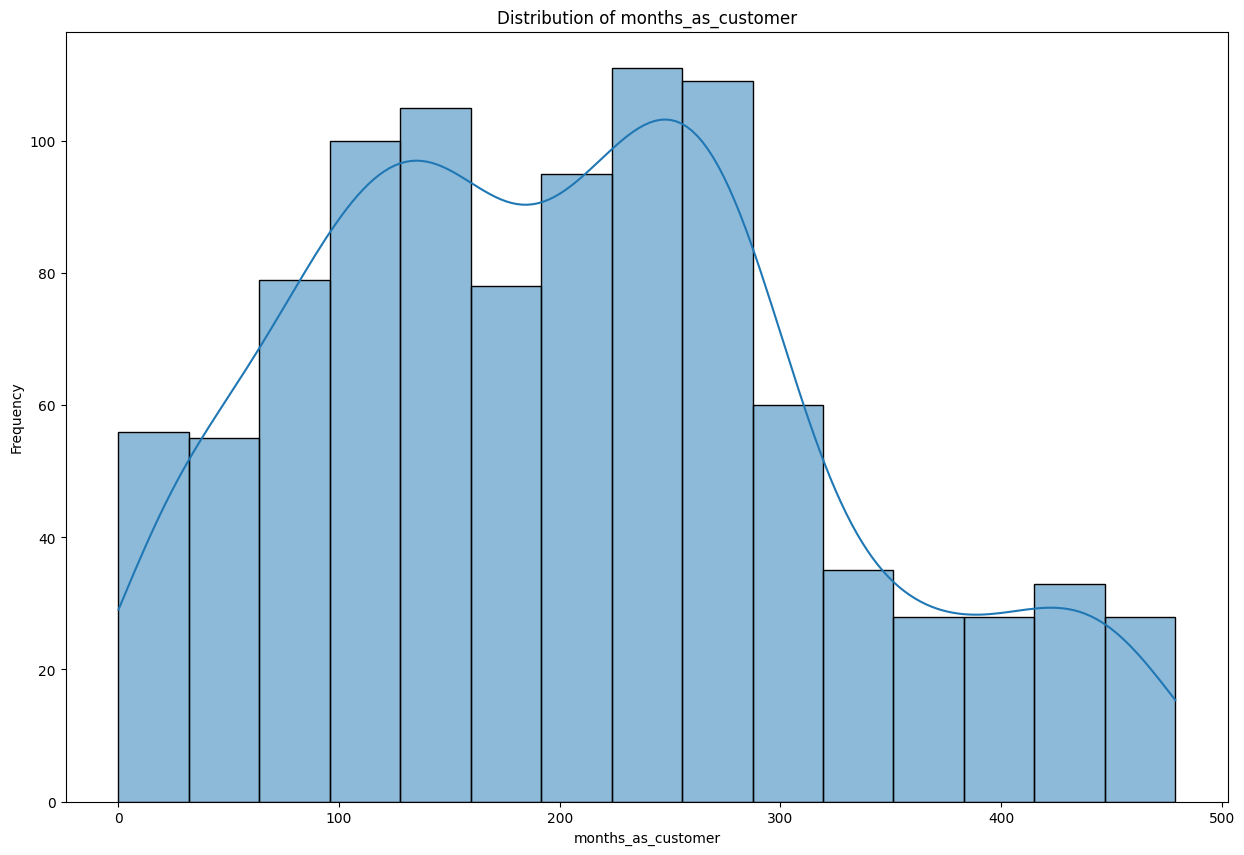

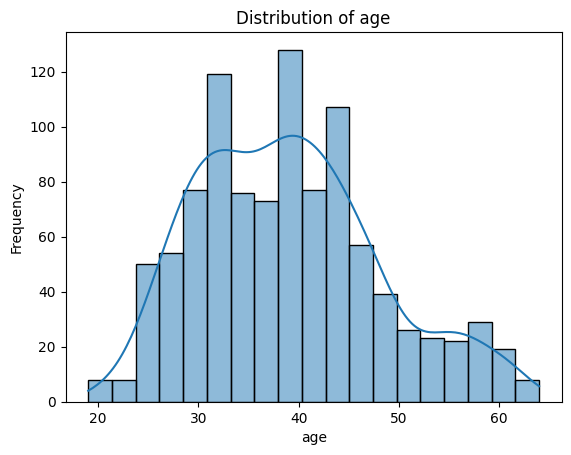

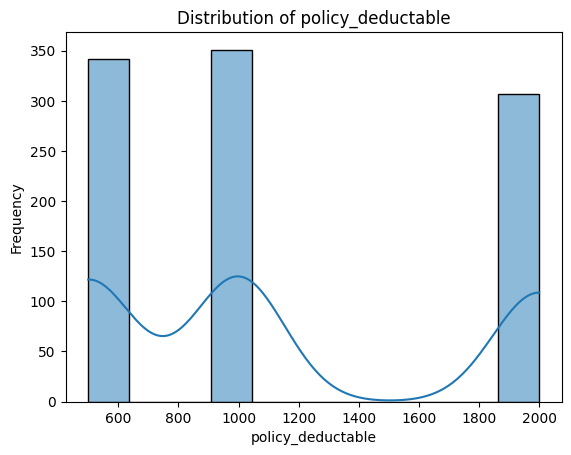

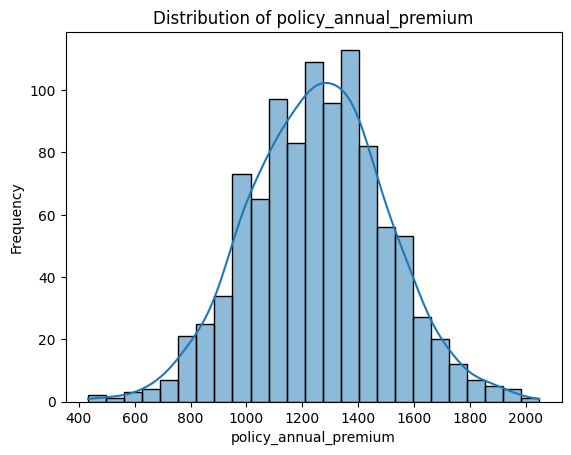

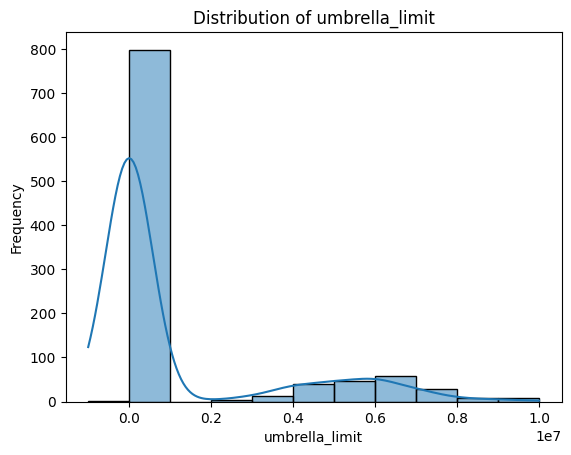

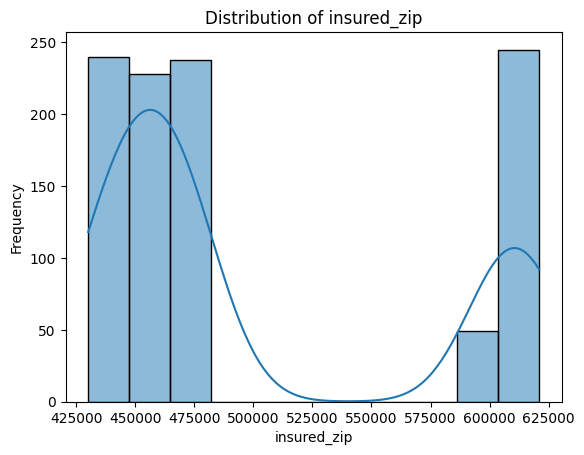

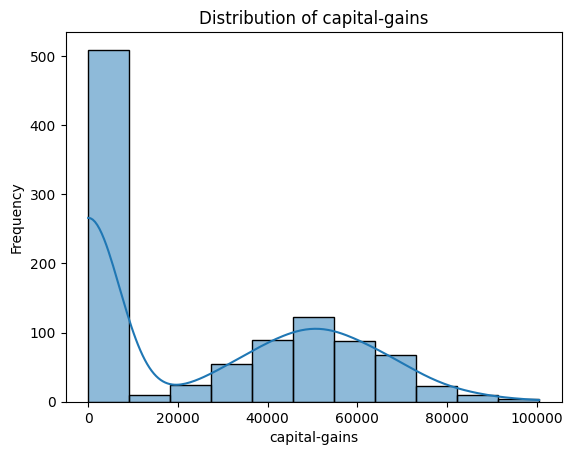

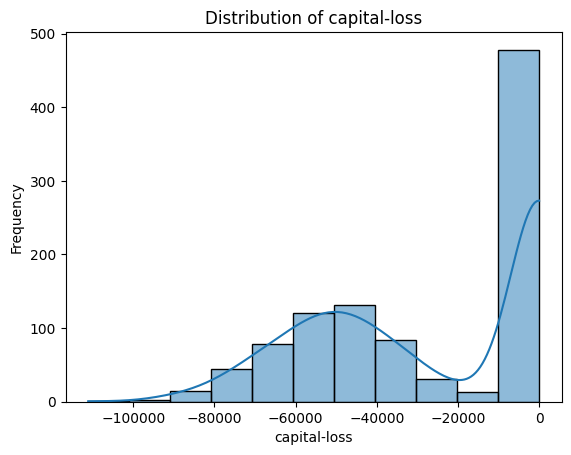

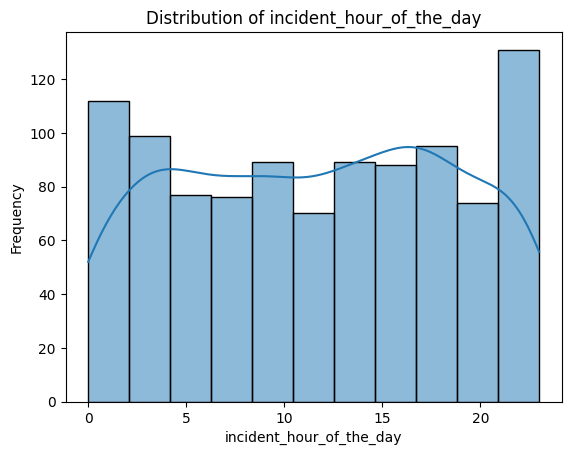

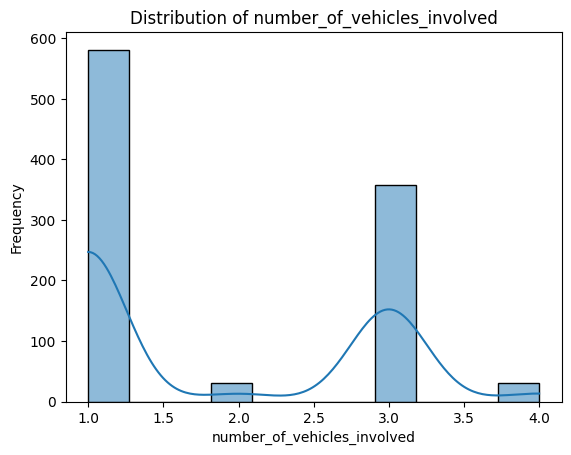

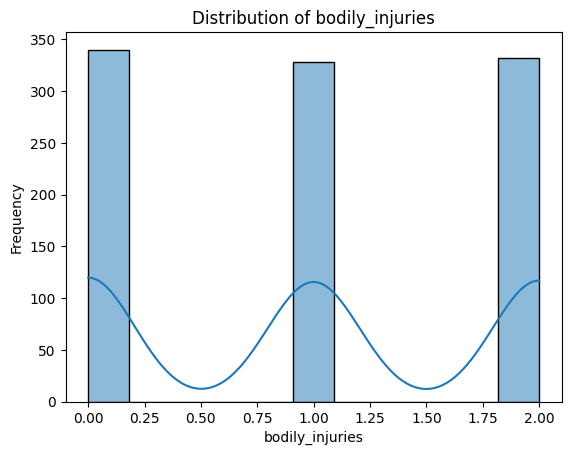

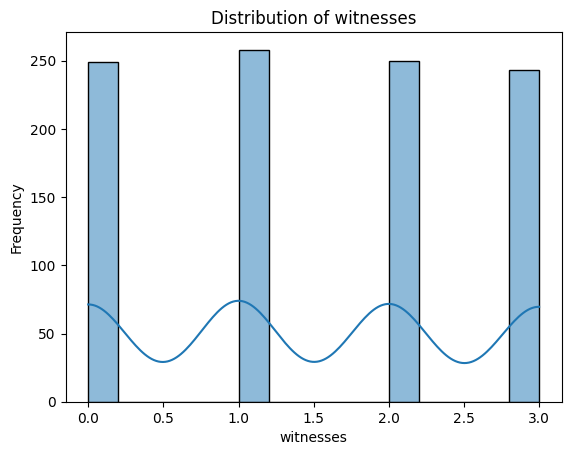

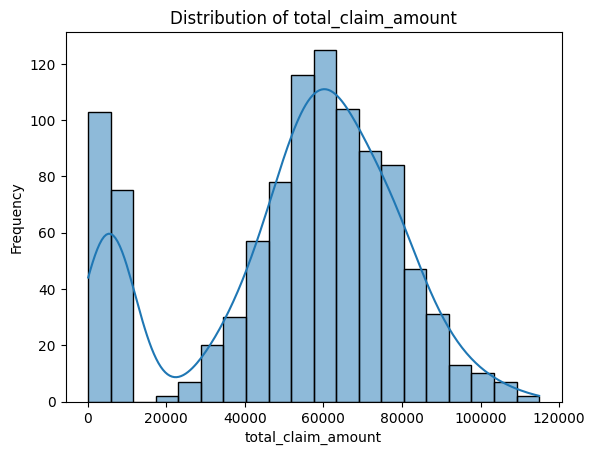

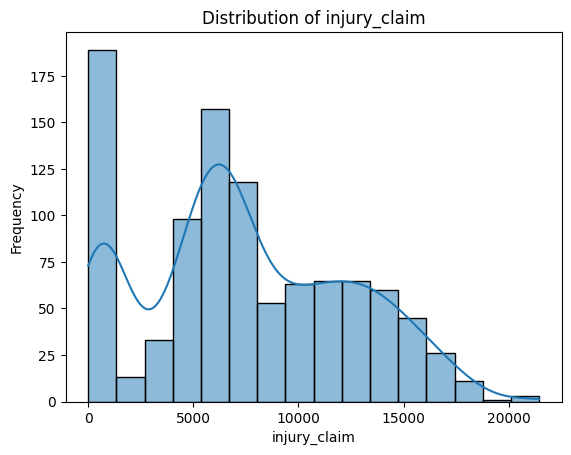

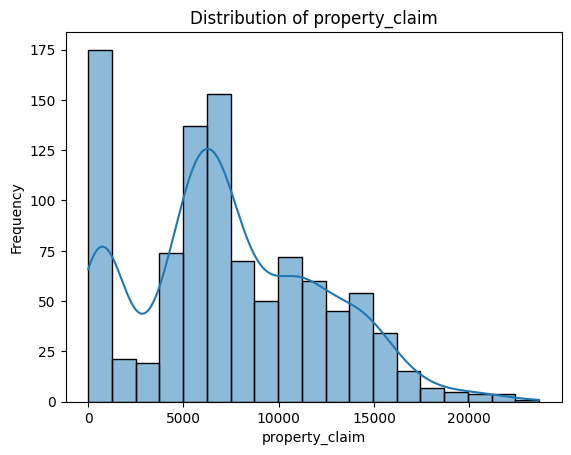

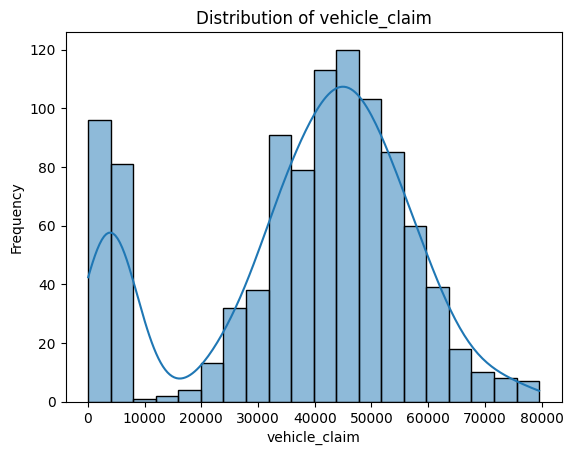

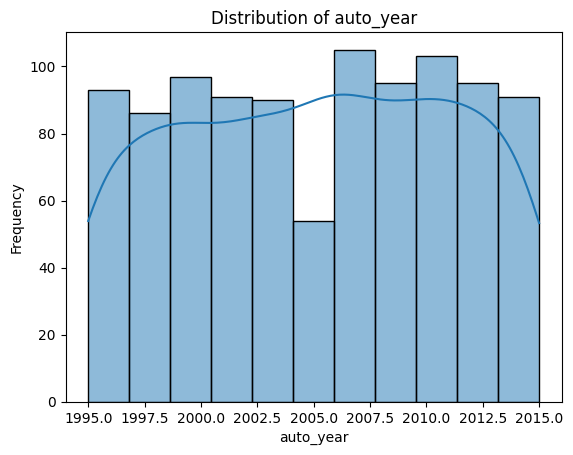

In [13]:
plt.figure(figsize=(15, 10))
for c in numerical_cols:
    sb.histplot(data=insurance, x=c, kde=True)
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {c}')
    plt.show()

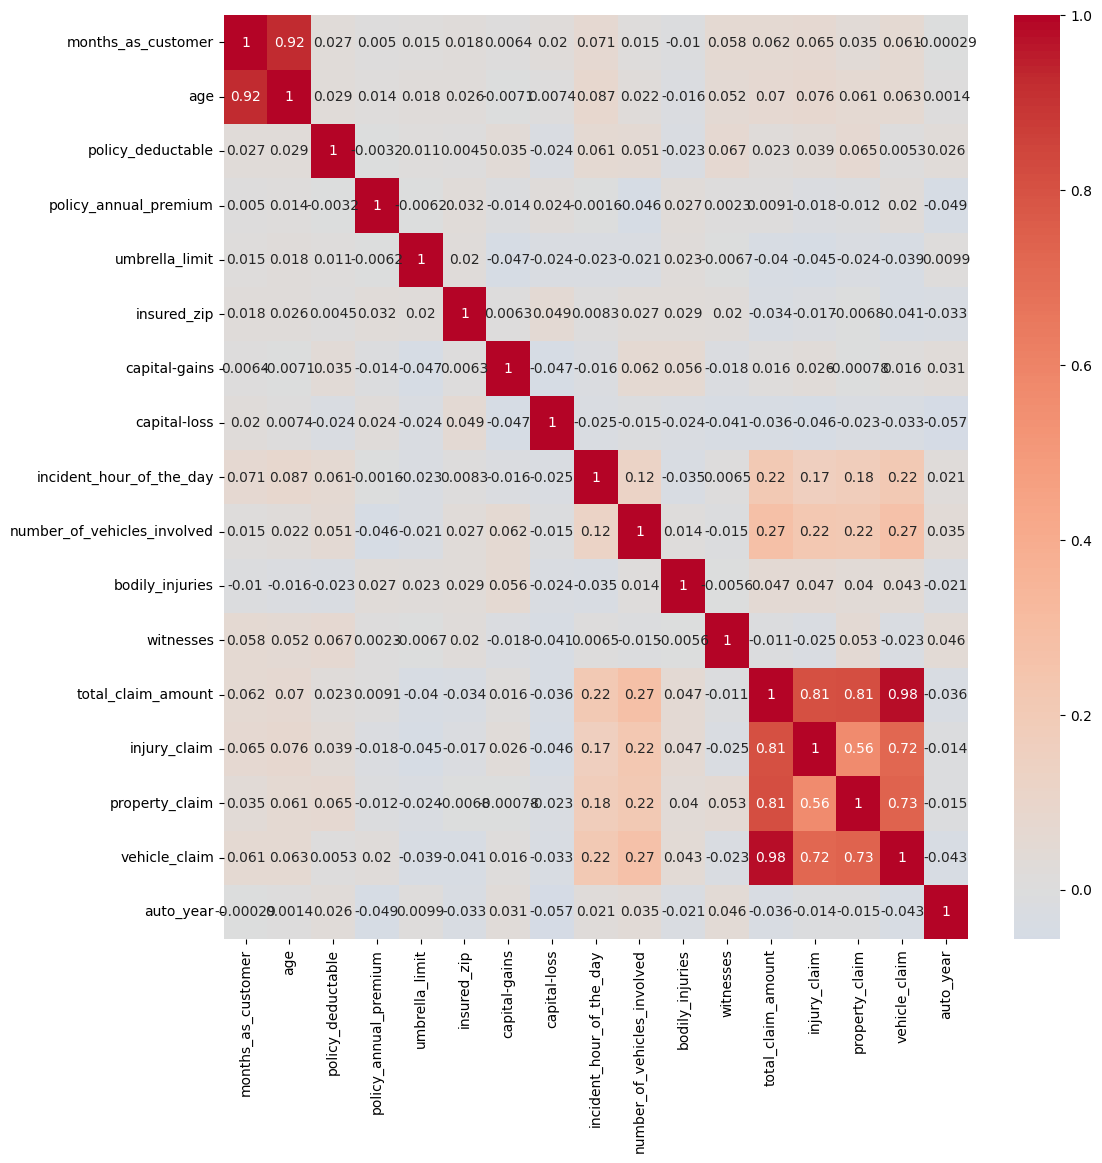

In [14]:
correlation_matrix = insurance.corr()

plt.figure(figsize=(12, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

Converting date into year, month, week, day

In [15]:
insurance['incident_date'] = pd.to_datetime(insurance['incident_date'])

insurance['incident_year'] = insurance['incident_date'].dt.year
insurance['incident_month'] = insurance['incident_date'].dt.month
insurance['incident_day'] = insurance['incident_date'].dt.day
insurance['incident_weekday'] = insurance['incident_date'].dt.weekday

Data Encoding using Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_cols = insurance.select_dtypes(include=['object']).columns

data = insurance.copy()

for i in categorical_cols:
    data[i] = encoder.fit_transform(data[i])

categorical_cols

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [17]:
num_cols = insurance.select_dtypes(include=['float64','int64']).columns
num_cols

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'incident_year', 'incident_month', 'incident_day',
       'incident_weekday'],
      dtype='object')

Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

Splititng the dataset into features and target variable

In [19]:
X = data.drop(['fraud_reported','incident_date'], axis=1)
y = data['fraud_reported']

Spliting the dataset into train and test data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building the different classification models and evaluating them

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       145
           1       0.62      0.36      0.46        55

    accuracy                           0.77       200
   macro avg       0.71      0.64      0.65       200
weighted avg       0.75      0.77      0.74       200

Accuracy: 0.765
Confusion Matrix:
 [[133  12]
 [ 35  20]]


In [22]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

print("XGBoost Classifier:")
print(classification_report(y_test, xgb_predictions))
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       145
           1       0.67      0.62      0.64        55

    accuracy                           0.81       200
   macro avg       0.76      0.75      0.76       200
weighted avg       0.81      0.81      0.81       200

Accuracy: 0.81
Confusion Matrix:
 [[128  17]
 [ 21  34]]


In [23]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

print("Support Vector Machine:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200

Accuracy: 0.725
Confusion Matrix:
 [[145   0]
 [ 55   0]]


In [24]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       145
           1       0.46      0.20      0.28        55

    accuracy                           0.71       200
   macro avg       0.60      0.56      0.55       200
weighted avg       0.67      0.71      0.67       200

Accuracy: 0.715
Confusion Matrix:
 [[132  13]
 [ 44  11]]


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_predictions))
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       145
           1       0.14      0.02      0.03        55

    accuracy                           0.70       200
   macro avg       0.43      0.49      0.43       200
weighted avg       0.56      0.70      0.61       200

Accuracy: 0.7
Confusion Matrix:
 [[139   6]
 [ 54   1]]


Based on accuracy and the F1-scores, the XGBoost Classifier seems to perform the best among the models. It has the highest accuracy and a balanced F1-score for both fraudulent and non-fraudulent claims.

Hyperparameter Tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, n_iter=10, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_xgb_model = random_search.best_estimator_

cross_val_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())

best_xgb_predictions = best_xgb_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Best XGBoost Classifier:")
print(classification_report(y_test, best_xgb_predictions))
print("Accuracy:", accuracy_score(y_test, best_xgb_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}
Best Score: 0.8387500000000001
Cross-Validation Scores: [0.8125  0.85    0.8     0.8375  0.89375]
Mean CV Score: 0.8387500000000001
Best XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       145
           1       0.64      0.69      0.67        55

    accuracy                           0.81       200
   macro avg       0.76      0.77      0.77       200
weighted avg       0.81      0.81      0.81       200

Accuracy: 0.81


OVerall, the accuracy of the model is 81%

Loading the model and checking the predictions for sample data

In [27]:
filename = 'xgb_model.pkl'
joblib.dump(best_xgb_model,filename)

['xgb_model.pkl']

In [28]:
loaded_model = joblib.load('xgb_model.pkl')

In [29]:
sample_data = pd.DataFrame({
    'months_as_customer': [123],
    'age': [35],
    'policy_state': ['OH'],
    'policy_csl': ['250/500'],
    'policy_deductable': [1000],
    'policy_annual_premium': [1200],
    'umbrella_limit': [0],
    'insured_zip': [43100],
    'insured_sex': ['MALE'],
    'insured_education_level': ['High School'],
    'insured_occupation': ['doctor'],
    'insured_hobbies': ['reading'],
    'insured_relationship': ['spouse'],
    'capital-gains': [5000],
    'capital-loss': [0],
    'incident_type': ['Single Vehicle Collision'],
    'collision_type': ['Front Collision'],
    'incident_severity': ['Major Damage'],
    'authorities_contacted': ['Police'],
    'incident_state': ['OH'],
    'incident_city': ['Columbus'],
    'incident_location': ['123 Main St'],
    'incident_hour_of_the_day': [8],
    'number_of_vehicles_involved': [1],
    'property_damage': ['YES'],
    'bodily_injuries': [1],
    'witnesses': [0],
    'police_report_available': ['YES'],
    'total_claim_amount': [10000],
    'injury_claim': [3000],
    'property_claim': [7000],
    'vehicle_claim': [0],
    'auto_make': ['Toyota'],
    'auto_model': ['Corolla'],
    'auto_year': [2015],
    'incident_year': [2022],
    'incident_month': [11],
    'incident_day': [16],
    'incident_weekday': [3]
})
sample_data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 123   35           OH    250/500               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                   1200               0        43100        MALE   

  insured_education_level  ... injury_claim property_claim vehicle_claim  \
0             High School  ...         3000           7000             0   

   auto_make  auto_model auto_year incident_year incident_month incident_day  \
0     Toyota     Corolla      2015          2022             11           16   

  incident_weekday  
0                3  

[1 rows x 39 columns]

In [30]:
categ_cols = sample_data.select_dtypes(include=['object']).columns

for i in categ_cols:
    sample_data[i] = encoder.fit_transform(sample_data[i])

In [31]:
prediction = loaded_model.predict(sample_data)

for p in prediction:
    if p == 0:
        print("Predicted: Not Fraud")
    else:
        print("Predicted: Fraud")

Predicted: Fraud
